ADD YOUR ACADEMIC INTERGITY STATEMENT HERE AS A COMMENT BLOCK BELOW. CHECK IMPORTANT NOTE FOR MORE DETAILS.
I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

END OF YOUR ACADEMIC INTERGITY STATEMENT

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive/datasets
!ls

Mounted at /content/drive
/
/content/drive/MyDrive/datasets
income_dataset.csv


In [2]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 as tf
from tensorflow.keras import layers
# from sklearn.preprocessing import MinMaxScaler
tf.disable_v2_behavior()

inc = pd.read_csv("income_dataset.csv",low_memory=False)

inc.dtypes





Instructions for updating:
non-resource variables are not supported in the long term


age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [3]:
inc.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
inc.shape

(32561, 15)

In [5]:
inc.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
inc.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
inc = inc[-inc.isin(["?"])]
inc = inc.dropna()
inc.reset_index(drop=True, inplace=True)

In [9]:
inc.shape

(30162, 15)

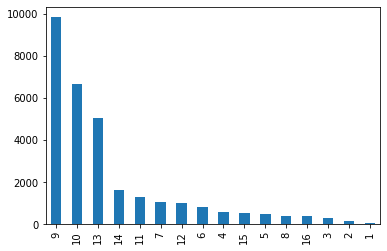

In [10]:
# Bar graph of education num
inc['education.num'].value_counts().plot.bar()

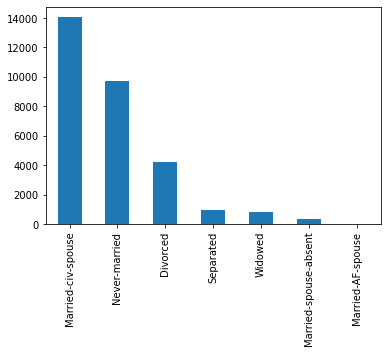

In [11]:
# Bar graph of marital.status
inc['marital.status'].value_counts().plot.bar()

Text(0, 0.5, 'Numbers')

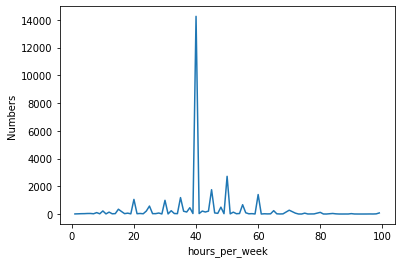

In [12]:
# Bar graph of hours per week
inc['hours.per.week'].value_counts().sort_index().plot()
plt.xlabel('hours_per_week')
plt.ylabel('Numbers')

In [13]:
workclass = pd.Categorical(inc['workclass'])
wc_code = pd.DataFrame(workclass.codes)


In [14]:
education = pd.Categorical(inc['education'])
edu_code = pd.DataFrame(education.codes)


In [15]:
marital_status = pd.Categorical(inc['marital.status'])
mry_code = pd.DataFrame(marital_status.codes)


In [16]:
occupation = pd.Categorical(inc['occupation'])
ocp_code = pd.DataFrame(occupation.codes)


In [17]:
relationship = pd.Categorical(inc['relationship'])
rlt_code = pd.DataFrame(relationship.codes)


In [18]:
native_country = pd.Categorical(inc['native.country'])
nc_code = pd.DataFrame(native_country.codes)


In [19]:
income = pd.Categorical(inc['income'])
inc_code = pd.DataFrame(income.codes)


In [20]:
data = pd.concat([inc['age'],wc_code,inc['fnlwgt'],edu_code,inc['education.num'],mry_code,ocp_code,rlt_code,inc['capital.gain'],inc['capital.loss'],inc['hours.per.week'],nc_code,inc_code],axis=1)
data.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "capital_gain","capital_loss","hours_per_week","native_country","income"]
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income
0,82,2,132870,11,9,6,3,1,0,4356,18,38,0
1,54,2,140359,5,4,0,6,4,0,3900,40,38,0
2,41,2,264663,15,10,5,9,3,0,3900,40,38,0
3,34,2,216864,11,9,0,7,4,0,3770,45,38,0
4,38,2,150601,0,6,5,0,4,0,3770,40,38,0
5,74,5,88638,10,16,4,9,2,0,3683,20,38,1
6,68,0,422013,11,9,0,9,1,0,3683,40,38,0
7,45,2,172274,10,16,0,9,4,0,3004,35,38,1
8,38,4,164526,14,15,4,9,1,0,2824,45,38,1
9,52,2,129177,9,13,6,7,1,0,2824,20,38,1


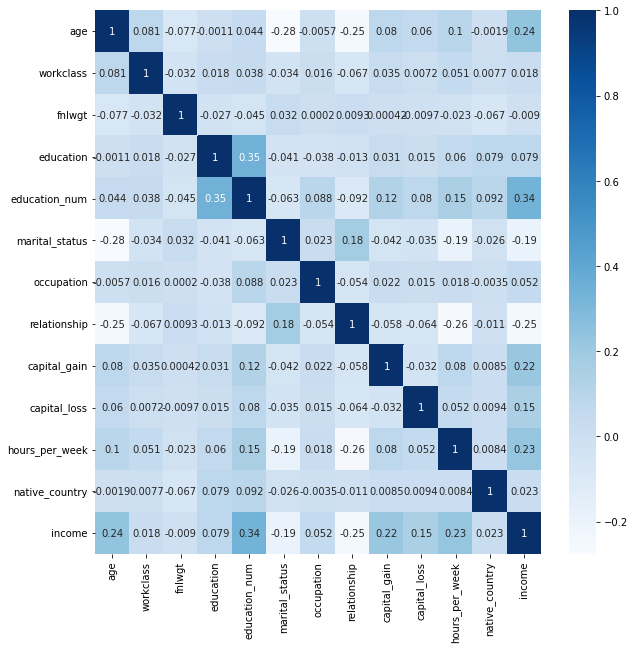

In [21]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Blues', annot=True)

In [22]:
age_min = inc['age'].min()
age_max = inc['age'].max()
age = inc['age']/inc['age'].max()

In [23]:
edun_min = inc['education.num'].min()
edun = inc['education.num'].max()
edun = inc['education.num']/inc['education.num'].max()

In [24]:
mry_min = mry_code.min()
mry_max = mry_code.max()
mry = mry_code/mry_code.max()

In [25]:
rlt_min = rlt_code.min()
rlt_max = rlt_code.max()
rlt = rlt_code/rlt_code.max()

In [26]:
capg_min = inc['capital.gain'].min()
capg_max = inc['capital.gain'].max()
capg = inc['capital.gain']/inc['capital.gain'].max()

In [27]:
capl_min = inc['capital.loss'].min()
capl_max = inc['capital.loss'].max()
capl = inc['capital.loss']/inc['capital.loss'].max()

In [28]:
hpw_min = inc['hours.per.week'].min()
hpw_max = inc['hours.per.week'].max()
hpw = inc['hours.per.week']/inc['hours.per.week'].max()

In [29]:
X = pd.concat([age,edun,mry,rlt,capg,capl,hpw],axis=1)
X.columns = ["age", "education_num", "marital_status", "relationship", "capital_gain","capital_loss","hours_per_week"]
X.head(10)

,age,education_num,marital_status,relationship,capital_gain,capital_loss,hours_per_week
0,0.911111,0.5625,1.000000,0.2,0.0,1.000000,0.181818
1,0.600000,0.2500,0.000000,0.8,0.0,0.895317,0.404040
2,0.455556,0.6250,0.833333,0.6,0.0,0.895317,0.404040
3,0.377778,0.5625,0.000000,0.8,0.0,0.865473,0.454545
4,0.422222,0.3750,0.833333,0.8,0.0,0.865473,0.404040
5,0.822222,1.0000,0.666667,0.4,0.0,0.845500,0.202020
6,0.755556,0.5625,0.000000,0.2,0.0,0.845500,0.404040
7,0.500000,1.0000,0.000000,0.8,0.0,0.689624,0.353535
8,0.422222,0.9375,0.666667,0.2,0.0,0.648301,0.454545
9,0.577778,0.8125,1.000000,0.2,0.0,0.648301,0.202020


In [30]:
Y = pd.concat([inc_code],axis=1)
Y.columns = ["income"]
Y.shape

(30162, 1)

In [31]:
train_X = X.iloc[:int(len(X)* 0.8),:]

test_X = X.iloc[int(len(X)* 0.8):,:]

train_Y = Y.iloc[:int(len(Y)* 0.8),:]

test_Y = Y.iloc[int(len(Y) * 0.8):,:]

train_X.reset_index(drop=True, inplace=True)
train_Y.reset_index(drop=True, inplace=True)
test_X.reset_index(drop=True, inplace=True)
test_Y.reset_index(drop=True, inplace=True)


In [33]:
train_X = train_X.to_numpy()
test_X = test_X.to_numpy()
train_Y = train_Y.to_numpy()
test_Y = test_Y.to_numpy()

In [34]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    weights = tf.Variable(tf.random_normal((in_size, out_size)))
    bias = tf.Variable(tf.zeros((1, out_size)) + 0.1)
    y = tf.matmul(inputs, weights) + bias
    if activation_function is None:
        outputs = y
    else:
        outputs = activation_function(y)
    return outputs

In [35]:
xs = tf.placeholder(tf.float32, [None, 7])
ys = tf.placeholder(tf.float32, [None, 1])

In [68]:
# l1 = add_layer(xs,7,11,activation_function=tf.nn.elu)
l1 = add_layer(xs,7,11,activation_function=tf.nn.relu)
# l1 = add_layer(xs,7,11,activation_function=tf.nn.sigmoid)
l2 = add_layer(l1,11,20,activation_function=tf.nn.sigmoid)
# l3 = add_layer(l2,11,13,activation_function=None)
pred = add_layer(l2,20,1,activation_function=None)
# pred = add_layer(l2,20,1,activation_function=tf.nn.softmax)

In [79]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-pred), reduction_indices=[1]))
# # cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(pred),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
# # train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

In [86]:
init = tf.global_variables_initializer()
# init = tf.constant_initializer(0)
# init = tf.random_normal_initialzer()

In [87]:
def process(s):
#     x_exp = np.exp(x)
#     x_sum = np.sum(x_exp, axis = 1, keepdims = True)
#     s = x_exp / x_sum  
    for i in range(len(s)):
        if s[i] >= 0.5:
            s[i] = 1;
        else: 
            s[i] = 0
    return s

In [88]:
def acc(pre,y):
    count = 0
    for i in range(len(pre)):
        if pre[i] == y[i]:
            count += 1
    return count/len(pre)

In [91]:
with tf.Session() as sess:
    sess.run(init)
    train_acc = []
    train_loss = []
    test_acc = []
    test_loss = []
    for i in range(10000):
        sess.run(train_step, feed_dict={xs: train_X, ys: train_Y})
        if i % 500 == 0:
            train_pred_value = sess.run(pred, feed_dict={xs: train_X})
            train_pred = process(train_pred_value)
            train_acc.append(acc(train_pred_value, train_Y))
            train_loss.append(sess.run(loss, feed_dict={xs: train_X, ys: train_Y}))
            test_pred_value = sess.run(pred, feed_dict={xs: test_X})
            test_pred = process(test_pred_value)
            test_acc.append(acc(test_pred_value, test_Y))
            test_loss.append(sess.run(loss, feed_dict={xs: test_X, ys: test_Y}))
            # print("train_acc = ",train_acc)
            # print("test_acc = ",test_acc)

<Figure size 1080x1080 with 0 Axes>

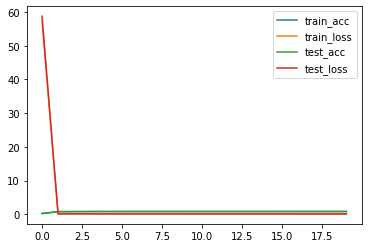

In [97]:
x = list(range(20))
plt.figure(figsize=(15,15))
fig = plt.figure()
sub = fig.add_subplot(111)
plot1, = sub.plot(x,train_acc)
plot2, = sub.plot(x,train_loss)
plot3, = sub.plot(x,test_acc)
plot4, = sub.plot(x,test_loss)
sub.legend([plot1,plot2,plot3,plot4],['train_acc','train_loss','test_acc','test_loss'])